In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

2023-10-26 11:44:27.713948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:

hdf5_file_path = '/Users/immanuelsam/Desktop/Data.h5'

with h5py.File(hdf5_file_path, 'r') as hdf5_file:
  
    dataset_names = list(hdf5_file.keys())

   
print("Available dataset names:", dataset_names)


Available dataset names: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


## a) Split the data into X_train, X_test, Y_train, Y_test

In [16]:
with h5py.File('/Users/immanuelsam/Desktop/Data.h5', 'r') as hdf:
    X_train = np.array(hdf.get('X_train'))
    Y_train = np.array(hdf.get('y_train'))

## b. Data Visualisation and preprocessing

## Loading the Data

In [19]:
with h5py.File('/Users/immanuelsam/Desktop/Data.h5', 'r') as hdf:
    X_data = np.array(hdf.get('X_train'))
    Y_data = np.array(hdf.get('y_train'))

## Splitting to train and test

In [43]:
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(X_data) * split_ratio)

X_train, X_test = X_data[:split_index], X_data[split_index:]
Y_train, Y_test = Y_data[:split_index], Y_data[split_index:]

## Visualizing the data

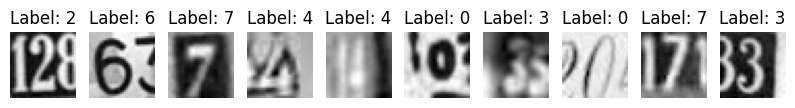

In [21]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {Y_train[i]}')
    plt.axis('off')

plt.show()

## c) Visualize the first 10 images

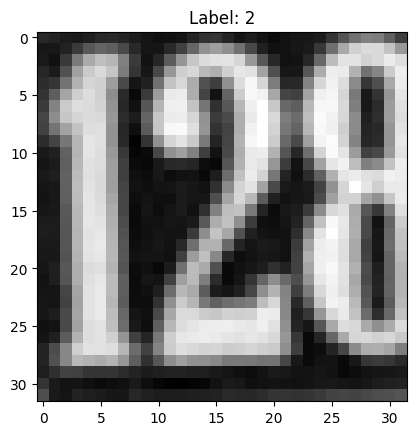

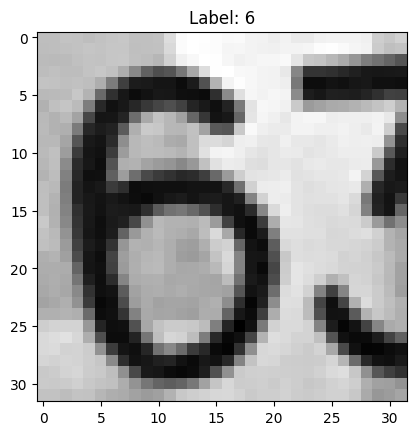

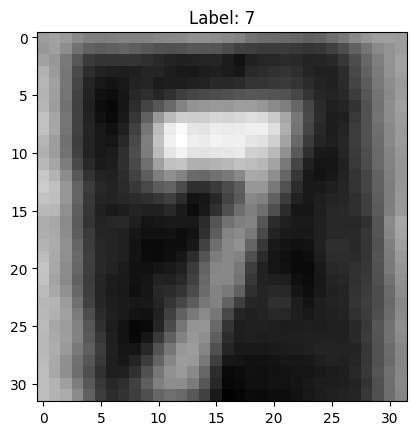

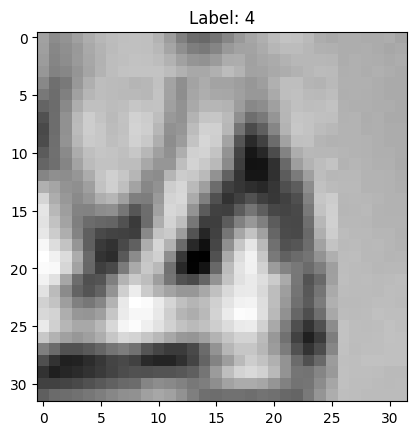

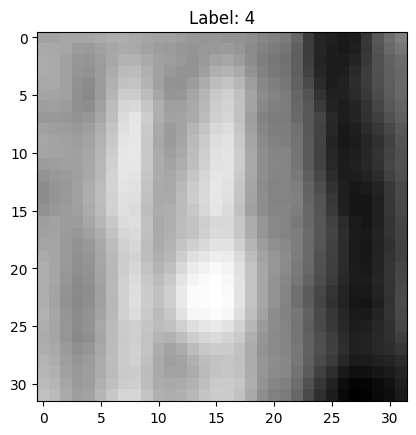

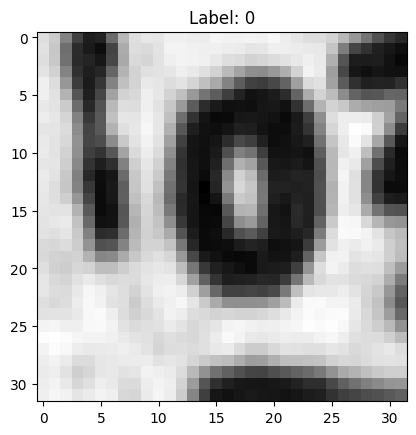

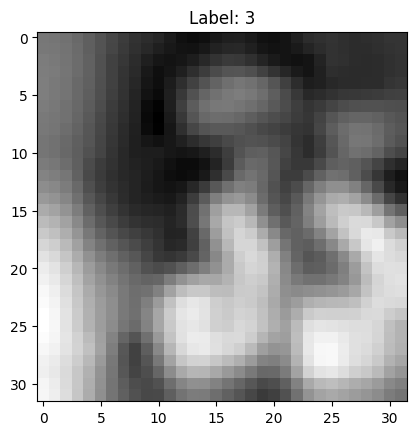

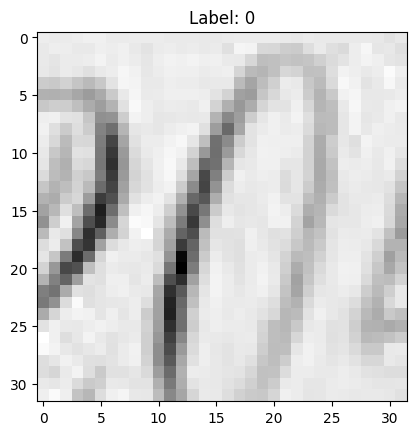

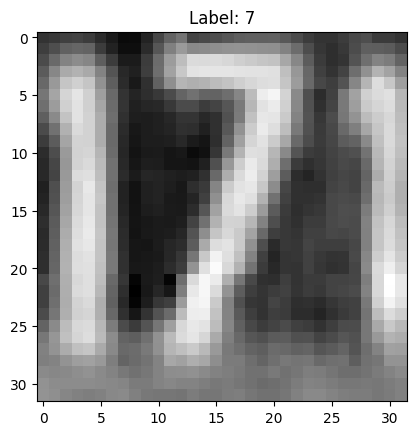

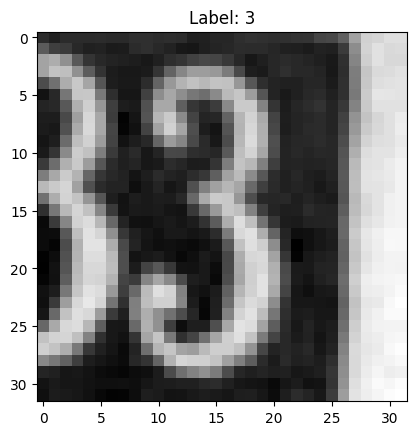

In [22]:
for i in range(10):
    plt.figure()
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {Y_train[i]}')

## d) Reshape all the images with appropriate shapes and update the data in the same variable.

In [24]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

## e) Normalise the images i.e. Normalise the pixel values.

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## f) Transform Labels into a format acceptable by Neural Network

In [26]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

## g) Print the total Number of classes in the Dataset

In [27]:
num_classes = Y_train.shape[1]
print("Number of classes:", num_classes)

Number of classes: 10


## h) Model Training & Evaluation using Neural Network(CNN)

In [28]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Compile the model

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Model Training & Evaluation

In [30]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, callbacks=[checkpoint, early_stop])

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 1.8849 - accuracy: 0.4129
Epoch 1: val_accuracy improved from -inf to 0.70905, saving model to best_model.h5
168/168 [==============================] - 17s 97ms/step - loss: 1.8849 - accuracy: 0.4129 - val_loss: 1.1868 - val_accuracy: 0.7090
Epoch 2/30
168/168 [==============================] - ETA: 0s - loss: 0.9418 - accuracy: 0.7463
Epoch 2: val_accuracy improved from 0.70905 to 0.79524, saving model to best_model.h5
168/168 [==============================] - 16s 95ms/step - loss: 0.9418 - accuracy: 0.7463 - val_loss: 0.7688 - val_accuracy: 0.7952
Epoch 3/30
168/168 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.8026
Epoch 3: val_accuracy improved from 0.79524 to 0.81952, saving model to best_model.h5
168/168 [==============================] - 17s 100ms/step - loss: 0.7134 - accuracy: 0.8026 - val_loss: 0.6580 - val_accuracy: 0.8195
Epoch 4/30
168/168 [==============================] - ETA

## i. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

### Plotting training history

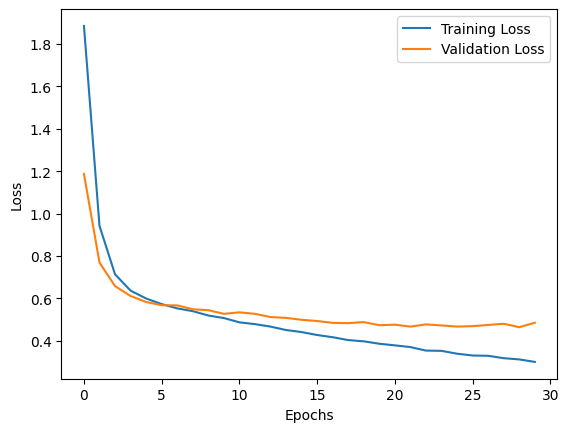

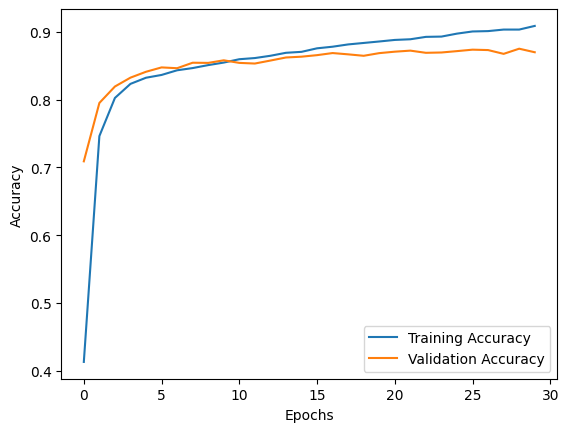

In [31]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Extract the loss and accuracy values from the 'history' object

In [32]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

### Create subplots for loss and accuracy

In [34]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

### Plot Training and Validation Loss

Text(0.5, 1.0, 'Training and Validation Loss')

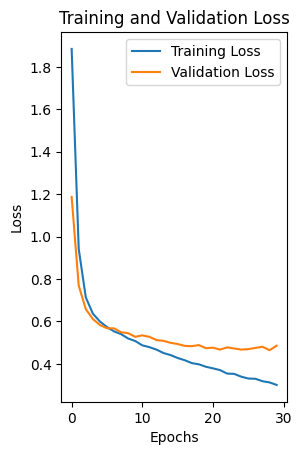

In [35]:
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

### Plot Training and Validation Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

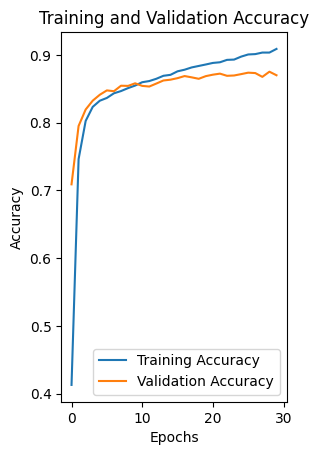

In [36]:
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

### Showing the plots

In [37]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## k) Summarize the history of the model

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## Evaluate the model

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4853590428829193
Test Accuracy: 0.870119035243988


## Make predictions

In [40]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

263/263 [==============================] - 1s 5ms/step


## Print classification report

In [41]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       848
           1       0.85      0.91      0.88       811
           2       0.89      0.92      0.91       814
           3       0.87      0.79      0.83       852
           4       0.87      0.91      0.89       873
           5       0.88      0.86      0.87       818
           6       0.75      0.89      0.82       828
           7       0.94      0.90      0.92       884
           8       0.86      0.80      0.83       852
           9       0.92      0.83      0.87       820

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.87      0.87      0.87      8400

